# **Colab Environment Setup**

In [1]:
# Clone Lab 2's github repository to get all of our material first

!git clone https://github.com/difersalest/DM2025-Lab2-Exercise.git

Cloning into 'DM2025-Lab2-Exercise'...
remote: Enumerating objects: 342, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 342 (delta 62), reused 58 (delta 58), pack-reused 239 (from 1)
Receiving objects: 100% (342/342), 151.97 MiB | 33.96 MiB/s, done.
Resolving deltas: 100% (90/90), done.


In [1]:
# Installing all of our dependencies
# The lab in colab was tested with this, and everything should work as intended
# If in your case something is not working please notify the TAs
!pip3 install python-dotenv==1.1.1 google-genai==1.33.0 langextract==1.0.9 langchain==0.3.27 langchain_community==0.3.29 langchain_core==0.3.75 langchain-google-genai==2.1.10 beautifulsoup4==4.13.5 chromadb==1.0.20 gradio==5.44.1 jupyter==1.1.1 scikit-learn==1.7.1 pandas==2.3.2 numpy==1.26.4 matplotlib==3.10.6 plotly==6.3.0 seaborn==0.13.2 nltk==3.9.1 umap-learn==0.5.9.post2 pymupdf==1.26.4

In [2]:
# test code for environment setup
# import library
import dotenv
from google import genai
import langextract
import langchain
from langchain_community import utils
from langchain_core import prompts
from langchain_google_genai import chat_models
from bs4 import BeautifulSoup
import chromadb
import gradio
import jupyter
import sklearn
import pandas
import numpy
import matplotlib
import plotly
import seaborn
import nltk
import umap
import pymupdf

%matplotlib inline

##### **OPTIONAL: If you want to save your outputs you can send them to your own drive by mounting the drive in the following way (uncomment the lines):**

In [ ]:

# Remember to change the directory of your outputs to your folder in the new mounted google drive inside colab
# from google.colab import drive
# drive.mount('/content/drive/')


**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Data Mining Lab 2 - Phase 2
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## Before Starting

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://drive.google.com/uc?export=view&id=1qurztXdx30Wl2vkCZg7KXXJYJXcE6YR_)

---
## **1. Data Preparation**

---
## **1.1 Load data**

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [3]:
import pandas as pd

### training data
anger_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [4]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [5]:
### testing data
anger_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("./DM2025-Lab2-Exercise/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [6]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [7]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### **1.2 Save data**

In [8]:
# save to pickle file
train_df.to_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df.to_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

In [9]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df.pkl")
test_df = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## **2. Large Language Models (LLMs)**

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs:

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### Open-Source vs. Proprietary LLMs
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](https://drive.google.com/uc?export=view&id=1ZvD7_yeSCETl98vXI5zo_TikF6Wpu0-r)

### Why Use Code (API) for Data Mining?

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](https://drive.google.com/uc?export=view&id=1UGHgSyH2-m2ZdjJXJ39_8RCgZov2z94d)

![pic14.png](https://drive.google.com/uc?export=view&id=1D0Q5KpS5bNIH8er0kb8SWt1nZJhfufWa)

### The Gemini API

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### Interacting with the Gemini API

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [15]:
import os
from google.colab import userdata
from google import genai
from google.genai import types


# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite"

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

# We input the API Key to be able to use the Gemini models
api_key = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )

            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config

            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### **2.1 Text Prompting**

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [16]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [17]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [18]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### **>>> Exercise 1 (Take home):**

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite).
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


In [19]:
# Answer here
input_prompt = ["鳳凰颱風現在狀況如何?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

鳳凰颱風目前已經減弱為熱帶性低氣壓，並朝著菲律賓東方海面移動。

根據中央氣象署的最新資訊，鳳凰颱風的動態如下：

*   **位置：** 目前位於鵝鑾鼻東方約 700 公里海面。
*   **移動方向：** 以每小時 20 公里速度，向西北西轉西北方向移動。
*   **強度：** 已減弱為熱帶性低氣壓。
*   **預測：** 預計未來將朝菲律賓東方海面移動，對台灣的直接影響機率不高。

**總結來說，鳳凰颱風目前已經減弱，對台灣的直接威脅已大幅降低。**

建議您可以持續關注中央氣象署的最新颱風動態，以獲取最準確的資訊。

*   **中央氣象署網站：** [https://www.cwa.gov.tw/](https://www.cwa.gov.tw/)


In [20]:
import os
from google.colab import userdata
from google import genai
from google.genai import types


# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-pro" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite"

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

# We input the API Key to be able to use the Gemini models
api_key = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )

            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config

            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

In [21]:
# Answer here
input_prompt = ["鳳凰颱風現在狀況如何?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

好的，為您說明關於「鳳凰颱風」的狀況。

首先，最重要的一點是：
**目前西北太平洋地區並沒有名為「鳳凰」(Fengshen) 的颱風正在活動。**

您會問到這個名字，很可能是對過去的某個鳳凰颱風有印象。颱風的名字是由世界氣象組織的颱風委員會制定，共有140個名字循環使用。因此，歷史上曾出現過好幾個「鳳凰颱風」。

以下是幾個比較有名的「鳳凰颱風」歷史回顧：

### 1. 2014年輕度颱風鳳凰 (FUNG-WONG)
*   **路徑與影響：** 這個颱風對台灣的影響相對較大，路徑非常特別。它從巴士海峽進入台灣海峽，沿著台灣西南部近海北上，雖然中心未登陸本島，但其外圍環流為台灣南部、東部及北部地區帶來了顯著的風雨。
*   **當時狀況：** 中央氣象局（現為氣象署）當時有發布海上及陸上颱風警報。

### 2. 2008年強烈颱風鳳凰 (FENGSHEN)
*   **路徑與影響：** 這個颱風是歷史上造成嚴重災情的颱風之一，主要重創菲律賓。它在菲律賓造成了大規模的洪水和山崩，最駭人聽聞的是導致渡輪「星辰公主號」(MV Princess of the Stars) 翻覆，造成數百人死亡的悲劇。
*   **對台灣影響：** 這個颱風的路徑離台灣較遠，主要影響菲律賓後進入南海，對台灣沒有直接衝擊。

### 3. 2019年輕度颱風鳳凰 (FUNG-WONG)
*   **路徑與影響：** 這個颱風的路徑主要在菲律賓東方海面，之後轉向東北方移動，朝日本南方海面前進。
*   **對台灣影響：** 它的外圍環流為台灣東半部帶來一些短暫降雨，但整體影響不大，中央氣象署僅發布海上颱風警報。

---

#### **總結**

*   **現在：** 沒有鳳凰颱風。
*   **過去：** 歷史上曾有多個鳳凰颱風，您可能對2014年那個路徑奇特、影響台灣的颱風有印象。

如果您想查詢最新的颱風資訊，建議您可以參考以下官方網站：
*   **台灣：** [交通部中央氣象署](https://www.cwa.gov.tw/V8/C/)
*   **日本：** [日本氣象廳](https://www.jma.go.jp/jma/index.html)


3.使用"gemini-2.5-flash-lite"的模型回答的答案比較簡略，相對地換成"gemini-2.5-pro"的模型，可以得到更多關於鳳凰颱風的資訊，還抓出了歷年也是叫鳳凰颱風的歷史紀錄，所以gemini-2.5-pro這個模型比較優。

In [22]:
import os
from google.colab import userdata
from google import genai
from google.genai import types


# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "你現在是一位專業的氣象專家"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-pro" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite"

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

# We input the API Key to be able to use the Gemini models
api_key = userdata.get('GOOGLE_API_KEY')
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )

            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config

            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

In [23]:
# Answer here
input_prompt = ["鳳凰颱風現在狀況如何?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

您好，身為氣象專家，很高興為您說明。

首先，最重要的一點是：**目前西北太平洋地區並沒有名為「鳳凰」的颱風正在活動。**

根據台灣中央氣象署、日本氣象廳以及美軍聯合颱風警報中心的最新資料，目前海面上並沒有任何一個熱帶氣旋被命名為「鳳凰」。

---

### 您為什麼會聽到「鳳凰颱風」？

您會提出這個問題，可能有以下幾個原因：

1.  **您可能指的是過去的颱風：** 「鳳凰」這個名字在颱風命名列表上，過去曾被多次使用。對台灣影響較為深刻的有：
    *   **2014年中度颱風鳳凰 (Fung-wong)：** 這個颱風的路徑非常特別，從巴士海峽北上，中心幾乎是「沿著」台灣東部海岸線掠過，為東半部及南部地區帶來顯著的風雨，尤其在高雄、屏東等地造成了淹水災情。
    *   **2008年強烈颱風鳳凰 (Fung-wong)：** 這個鳳凰颱風則是直接登陸台灣的「穿心颱」，從花蓮登陸，由西部出海，對全台灣都造成了強風豪雨的影響，是當年一個災情相當嚴重的颱風。

2.  **誤聽或誤傳的資訊：** 有時候天氣預報會提到未來可能生成的熱帶系統，但命名是在其強度達到「輕度颱風」等級後才會進行。您聽到的可能是關於某個熱帶性低氣壓的討論，但它尚未被命名。

---

### 如何獲得最正確的颱風資訊？

為了確保您能隨時掌握最即時、最準確的颱風動態，建議您參考以下官方權威機構的資訊：

*   **台灣中央氣象署：** [https://www.cwa.gov.tw/V8/C/](https://www.cwa.gov.tw/V8/C/)
    *   這是台灣最主要的官方預報來源，資訊更新最快，也最符合在地需求。
*   **日本氣象廳 (JMA)：** [https://www.jma.go.jp/jma/index.html](https://www.jma.go.jp/jma/index.html)
    *   是世界氣象組織指定的西北太平洋區颱風預報中心，其預報具有高度的權威性。
*   **美軍聯合颱風警報中心 (JTWC)：**
    *   提供另一種角度的預報參考，許多氣象愛好者也會關注。

**總結來說，請您放心，目前並沒有「鳳凰颱風」的威脅。** 在關心颱風動態時，請務必確認資訊的發布時間與來源，以官方機構的最新公告為準。


把角色換成是氣象專家得到的回答更為專業些，但內容沒有與原本的有太多不同。

---
### **2.2 Structured Output**

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/)

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [24]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [25]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "從氣象學角度解析人工智慧",
    "subsections": [
      {
        "sub_title": "機器學習：現代天氣預報的核心",
        "sub_explanation": "就像我們將數十年的氣溫、氣壓、濕度等歷史數據輸入電腦，讓模型學習大氣運作的模式來預測颱風路徑一樣。機器學習就是讓系統從大量資料中『學習』規律，以做出預測或決策，而不需要為每種情況單獨編寫程式。"
      },
      {
        "sub_title": "資料中心：氣象超級電腦的家",
        "sub_explanation": "您可以將資料中心想像成國家氣象中心或高速電腦中心。它是一個實體設施，裡面裝滿了成千上萬台強大的伺服器，提供運行複雜天氣模型和機器學習所需的龐大計算能力、儲存空間和冷卻系統。沒有這個強大的基礎設施，精準的預報就無從談起。"
      },
      {
        "sub_title": "大型語言模型 (LLM)：博學的氣象播報員",
        "sub_explanation": "LLM是一種極其龐大且複雜的機器學習模型。如果說傳統模型能預測『明天會下雨』，那麼LLM就像一位博學的氣象專家，不僅能預測天氣，還能用流暢的語言為您撰寫一份詳細的天氣報告、解釋聖嬰現象的成因，甚至回答您關於歷史氣候事件的提問。"
      },
      {
        "sub_title": "三者關係：從計算能力到智慧洞察",
        "sub_explanation": "這三者的關係環環相扣：我們在『資料中心』這個強大的硬體基礎上，運行『機器學習』演算法來進行訓練。而『大型語言模型』就是一種需要極高計算資源的頂尖機器學習應用。簡單來說，資料中心是提供動力的引擎，機器學習是分析和預測的方法，而大型語言模型則是利用這種方法產生的、能夠與人深度溝通的智慧結晶。"
      }
    ]
  }
]


In [26]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': '從氣象學角度解析人工智慧', 'subsections': [{'sub_title': '機器學習：現代天氣預報的核心', 'sub_explanation': '就像我們將數十年的氣溫、氣壓、濕度等歷史數據輸入電腦，讓模型學習大氣運作的模式來預測颱風路徑一樣。機器學習就是讓系統從大量資料中『學習』規律，以做出預測或決策，而不需要為每種情況單獨編寫程式。'}, {'sub_title': '資料中心：氣象超級電腦的家', 'sub_explanation': '您可以將資料中心想像成國家氣象中心或高速電腦中心。它是一個實體設施，裡面裝滿了成千上萬台強大的伺服器，提供運行複雜天氣模型和機器學習所需的龐大計算能力、儲存空間和冷卻系統。沒有這個強大的基礎設施，精準的預報就無從談起。'}, {'sub_title': '大型語言模型 (LLM)：博學的氣象播報員', 'sub_explanation': 'LLM是一種極其龐大且複雜的機器學習模型。如果說傳統模型能預測『明天會下雨』，那麼LLM就像一位博學的氣象專家，不僅能預測天氣，還能用流暢的語言為您撰寫一份詳細的天氣報告、解釋聖嬰現象的成因，甚至回答您關於歷史氣候事件的提問。'}, {'sub_title': '三者關係：從計算能力到智慧洞察', 'sub_explanation': '這三者的關係環環相扣：我們在『資料中心』這個強大的硬體基礎上，運行『機器學習』演算法來進行訓練。而『大型語言模型』就是一種需要極高計算資源的頂尖機器學習應用。簡單來說，資料中心是提供動力的引擎，機器學習是分析和預測的方法，而大型語言模型則是利用這種方法產生的、能夠與人深度溝通的智慧結晶。'}]}]
<class 'list'>


In [27]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


從氣象學角度解析人工智慧 

	 機器學習：現代天氣預報的核心 

		 就像我們將數十年的氣溫、氣壓、濕度等歷史數據輸入電腦，讓模型學習大氣運作的模式來預測颱風路徑一樣。機器學習就是讓系統從大量資料中『學習』規律，以做出預測或決策，而不需要為每種情況單獨編寫程式。 

	 資料中心：氣象超級電腦的家 

		 您可以將資料中心想像成國家氣象中心或高速電腦中心。它是一個實體設施，裡面裝滿了成千上萬台強大的伺服器，提供運行複雜天氣模型和機器學習所需的龐大計算能力、儲存空間和冷卻系統。沒有這個強大的基礎設施，精準的預報就無從談起。 

	 大型語言模型 (LLM)：博學的氣象播報員 

		 LLM是一種極其龐大且複雜的機器學習模型。如果說傳統模型能預測『明天會下雨』，那麼LLM就像一位博學的氣象專家，不僅能預測天氣，還能用流暢的語言為您撰寫一份詳細的天氣報告、解釋聖嬰現象的成因，甚至回答您關於歷史氣候事件的提問。 

	 三者關係：從計算能力到智慧洞察 

		 這三者的關係環環相扣：我們在『資料中心』這個強大的硬體基礎上，運行『機器學習』演算法來進行訓練。而『大型語言模型』就是一種需要極高計算資源的頂尖機器學習應用。簡單來說，資料中心是提供動力的引擎，機器學習是分析和預測的方法，而大型語言模型則是利用這種方法產生的、能夠與人深度溝通的智慧結晶。 



##### **>>> Exercise 2 (Take home):**

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [30]:
# Answer here
from pydantic import BaseModel
from typing import List, Optional

# 一天行程中的單一活動
class Activity(BaseModel):
    time: str                 # 例如 "09:30–11:00"
    title: str                # 活動名稱，例如 "參觀博物館"
    location: str             # 活動地點
    description: str          # 活動內容說明
    importance_level: int     # 1~5，表示重要程度

# 每一天的行程規劃
class DayPlan(BaseModel):
    date: str                 # 例如 "2025-07-15"
    day_title: str            # 例如 "歷史文化探索日"
    budget_level: str         # 例如 "low", "medium", "high"
    activities: List[Activity]
    daily_tip: Optional[str] = None  # 當天的小提醒或建議

# 整趟旅程的完整結構
class TravelItinerary(BaseModel):
    traveler_name: str        # 旅客名稱
    trip_title: str           # 行程標題，例如 "三天兩夜台中小旅行"
    origin_city: str          # 出發地
    destination_city: str     # 目的地
    start_date: str
    end_date: str
    travel_purpose: str       # 例如 "家庭旅遊", "研究考察", "美食之旅"
    overall_notes: Optional[str] = None
    days: List[DayPlan]

# === 實際呼叫模型 ===
input_prompt = [
    "Plan a detailed 3-day trip in Taichung, Taiwan, for a traveler who likes museums and local food. "
    "Return data that follows the TravelItinerary schema."
]

# 這裡假設 prompt_gemini 是你包裝過的函式，跟範例一樣可以指定 schema
text_response = prompt_gemini(
    input_prompt=input_prompt,
    schema=list[TravelItinerary]   # 回傳「一個或多個行程」的 list
)

print("=== 原始文字輸出 ===")
print(text_response)

# === 將輸出轉為 Python 可用物件 ===
import json

structured_resp = json.loads(text_response)
print("\n=== 轉成 Python 物件後 ===")
print(structured_resp)
print(type(structured_resp))   # 應該會是 <class 'list'>

# === 探索輸出並友善列印 ===
for trip in structured_resp:
    print("\n==============================")
    print(f"行程名稱：{trip['trip_title']}")
    print(f"旅客：{trip['traveler_name']}")
    print(f"出發地：{trip['origin_city']}  →  目的地：{trip['destination_city']}")
    print(f"日期：{trip['start_date']} ~ {trip['end_date']}")
    print(f"目的：{trip['travel_purpose']}")
    if trip.get('overall_notes'):
        print(f"備註：{trip['overall_notes']}")

    for day in trip['days']:
        print(f"\n  日期：{day['date']}  -  {day['day_title']}  (預算：{day['budget_level']})")
        if day.get('daily_tip'):
            print(f"    小提醒：{day['daily_tip']}")

        for activity in day['activities']:
            print(f"    - {activity['time']} | {activity['title']} @ {activity['location']}")
            print(f"      說明：{activity['description']}")
            print(f"      重要程度：{activity['importance_level']}")

=== 原始文字輸出 ===
[
  {
    "traveler_name": "Culture and Food Enthusiast",
    "trip_title": "Taichung's Artistic Flavors: A 3-Day Museum and Culinary Journey",
    "origin_city": "Taipei",
    "destination_city": "Taichung, Taiwan",
    "start_date": "2024-10-18",
    "end_date": "2024-10-20",
    "travel_purpose": "Leisure trip focusing on museums and local cuisine.",
    "overall_notes": "This itinerary balances major museum visits with explorations of Taichung's famous food scenes, from traditional markets to modern night markets. Transportation will primarily rely on the city's public bus system and occasional taxis/ride-sharing for convenience. Remember to bring comfortable walking shoes.",
    "days": [
      {
        "date": "2024-10-18",
        "day_title": "Art, History, and Sweet Treats",
        "budget_level": "Moderate",
        "activities": [
          {
            "time": "09:30",
            "title": "National Taiwan Museum of Fine Arts",
            "location": "Nat

---
### **2.3 Information Extraction and Grounding:**

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### **`langextract`: A Library for Grounded Extraction**

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### **2.3.1 Using PDF Documents:**

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [31]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./DM2025-Lab2-Exercise/data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './DM2025-Lab2-Exercise/data/documents/doc_example_review_interstellar.pdf'


In [32]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [33]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [34]:
import os
import langextract as lx

# We define our main langextract function
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")

    output_dir = "./DM2025-Lab2-Exercise/results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")

    # returning html content for display
    return html_content

In [35]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 237.56 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 4.48MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_example_vis.html


In [36]:
import json
# We can also observe the structure of the raw extracted data
with open("./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [37]:
html_content

---
##### **>>> Bonus Exercise 3 (Take home):**

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [40]:
# Answer here
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./DM2025-Lab2-Exercise/data/documents/ABC.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './DM2025-Lab2-Exercise/data/documents/ABC.pdf'


In [41]:
print(formatted_text)

**Page 1**
"""
Movie Review: Interstellar (Long-form Sample Review) Christopher Nolan’s “Interstellar” stands as one
of the most ambitious cinematic attempts to merge hard science, emotional storytelling, and
philosophical inquiry into a unified experience. Set in a near-future world plagued by ecological
collapse, the film follows Cooper, a former NASA pilot turned farmer, who is recruited to travel through
a wormhole in search of a new home for humanity. What makes “Interstellar” particularly compelling is
not merely its spectacle, but its deep exploration of human resilience, sacrifice, and the enduring
connection between parents and children. One of the strongest aspects of “Interstellar” lies in its
thematic depth. Nolan frames humanity’s survival not as a triumph of technology alone, but as a
testament to cooperation, trust, and emotional courage. The relationship between Cooper and his
daughter Murph drives the emotional center of the film. Their bond not only shapes the narrati

In [42]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

In [43]:
import os
import langextract as lx

# We define our main langextract function
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")

    output_dir = "./DM2025-Lab2-Exercise/results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")

    # returning html content for display
    return html_content

In [44]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 25 entities:

• opinion_statement: 'one of the most ambitious cinematic attempts to merge hard science, emotional storytelling, and philosophical inquiry into a unified experience'
  - subject: Interstellar
  - sentiment: Positive
  - key_phrase: most ambitious cinematic attempts
• opinion_statement: 'deep exploration of human resilience, sacrifice, and the enduring connection between parents and children'
  - subject: Interstellar
  - sentiment: Positive
  - key_phrase: deep exploration
• opinion_statement: 'One of the strongest aspects of “Interstellar” lies in its thematic depth'
  - subject: Thematic depth
  - sentiment: Positive
  - key_phrase: strongest aspects
• opinion_statement: 'a testament to cooperation, trust, and emotional courage'
  - subject: Humanity's survival
  - sentiment: Positive
  - key_phrase: testament to cooperation, trust, and emotional courage
• opinion_statement: 'drives the emotional center of the film'
  - subject: The relationship between Coope

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 275.34 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 13.7k/13.7k [00:00<00:00, 17.2MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_example_vis.html


In [45]:
import json
# We can also observe the structure of the raw extracted data
with open("./DM2025-Lab2-Exercise/results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'one of the most ambitious cinematic attempts to merge hard science, emotional storytelling, and philosophical inquiry into a unified experience',
   'char_interval': {'start_pos': 113, 'end_pos': 256},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Interstellar',
    'sentiment': 'Positive',
    'key_phrase': 'most ambitious cinematic attempts'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'deep exploration of human resilience, sacrifice, and the enduring connection between parents and children',
   'char_interval': {'start_pos': 548, 'end_pos': 653},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': 'Interstellar',
    'sentiment': 'Positive',
    'key_phrase': 'deep exploration'}},
  {'extraction_class':

In [46]:
html_content

我覺得最後結果算還可以，第一次成功跑出來並且沒有bug，還明確標示出段落的一些內容，但應該可以在更精準些。

---
### **2.4 Generating LLM Embeddings:**

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [47]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [48]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/tmp/ipython-input-2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/tmp/ipython-input-2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [49]:
train_df_new["emotion"].value_counts()

,count
emotion,
fear,51
anger,38
joy,36
sadness,35


In [50]:
test_df_new["emotion"].value_counts()

,count
emotion,
fear,13
anger,10
joy,9
sadness,8


In [51]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [52]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [53]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [54]:
train_df_new #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,embeddings_values
743,10743,This all resent #India #Pakistan problem is sa...,anger,0.312,"[values=[-0.030633448, 0.0054857237, 0.0262252...","[-0.030633448, 0.0054857237, 0.026225273, -0.0..."
111,10111,I'm about to block everyone everywhere posting...,anger,0.708,"[values=[-0.0063689845, 0.0019841124, -0.00642...","[-0.0063689845, 0.0019841124, -0.0064298953, -..."
606,10606,"@ParrishWalton @kjmgolf Also, our best assets ...",anger,0.396,"[values=[0.013862819, -0.0075358283, 0.0108864...","[0.013862819, -0.0075358283, 0.010886435, -0.0..."
266,10266,I wonder what American city will be next to pr...,anger,0.562,"[values=[-0.024912314, 0.008063319, 0.02870875...","[-0.024912314, 0.008063319, 0.028708756, -0.04..."
127,10127,I just love it when people make plans for me w...,anger,0.688,"[values=[-0.018088536, 0.00061540486, -0.01482...","[-0.018088536, 0.00061540486, -0.014829202, -0..."
...,...,...,...,...,...,...
3259,40432,@SkyNews err I wasnt gloomy. 17.2 mio people ...,sadness,0.458,"[values=[-0.008862734, 0.014259609, 0.01820141...","[-0.008862734, 0.014259609, 0.01820141, -0.088..."
3120,40293,@JamesWickham Congratulations! My top home-ow...,sadness,0.562,"[values=[-0.0045117354, 0.035140257, -0.005971...","[-0.0045117354, 0.035140257, -0.0059713046, -0..."
3408,40581,@Netflix_ME penny dreadful season 3?,sadness,0.354,"[values=[0.0044877334, -0.022651747, 0.0212477...","[0.0044877334, -0.022651747, 0.021247754, -0.0..."
2862,40035,I wouldn't wish anxiety and depression even on...,sadness,0.833,"[values=[-0.017393228, -0.00061749696, -0.0162...","[-0.017393228, -0.00061749696, -0.016202997, -..."


In [55]:
test_df_new #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings,embeddings_values
256,30885,@MacDsmash you should get some @SSB_Swedish de...,joy,0.404,"[values=[-0.004426737, -0.013607771, -0.027698...","[-0.004426737, -0.013607771, -0.027698934, -0...."
113,21176,@soozclifford Sure have... Sydney are too toug...,fear,0.340,"[values=[-0.02130687, -0.016090302, 0.01576546...","[-0.02130687, -0.016090302, 0.015765466, -0.05..."
38,10895,For the first time in my madden career I just ...,anger,0.271,"[values=[-0.007640768, 0.0021543652, -0.001003...","[-0.007640768, 0.0021543652, -0.0010031069, -0..."
267,30896,It feels good to get outside for a minute and ...,joy,0.708,"[values=[-0.009077298, -0.00353596, -0.0197640...","[-0.009077298, -0.00353596, -0.019764088, -0.0..."
60,10917,I think our defense here at USC is playing wel...,anger,0.250,"[values=[-0.011085541, -0.015644377, 0.0231633...","[-0.011085541, -0.015644377, 0.02316334, -0.09..."
276,40789,"Stars, when you shine,\nYou know how I feel.\n...",sadness,0.292,"[values=[0.011783604, 0.007787306, 0.008415056...","[0.011783604, 0.007787306, 0.008415056, -0.080..."
159,21222,Thanks for ripping me off again #Luthansa €400...,fear,0.375,"[values=[-0.004335187, -0.025928125, -0.022795...","[-0.004335187, -0.025928125, -0.022795422, -0...."
296,40809,"@DxfyingGrxvity - frustration, looking up at E...",sadness,0.479,"[values=[-0.00797378, -0.014481293, -0.0166578...","[-0.00797378, -0.014481293, -0.01665783, -0.07..."
253,30882,@chencouture LMAO Is it that 'so slutty' hater...,joy,0.700,"[values=[-0.013635297, 0.0371389, -0.013098068...","[-0.013635297, 0.0371389, -0.013098068, -0.062..."
16,10873,"Is it me, or is Ding wearing the look of a man...",anger,0.500,"[values=[-0.009913362, -0.003055955, -0.015127...","[-0.009913362, -0.003055955, -0.015127845, -0...."


In [56]:
# save them to pickle files
train_df_new.to_pickle("./DM2025-Lab2-Exercise/data/train_df_sample_embeddings.pkl")
test_df_new.to_pickle("./DM2025-Lab2-Exercise/data/test_df_sample_embeddings.pkl")

In [57]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./DM2025-Lab2-Exercise/data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./DM2025-Lab2-Exercise/data/test_df_sample_embeddings.pkl")

In [58]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072

3072

In [59]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28)
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### **>>> Exercise 4 (Take home):**

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [60]:
# Answer here
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for 3D dimensionality reduction
reducer = umap.UMAP(n_components=3, metric='cosine', random_state=28)
embedding_3d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']

# Visualize the embeddings with Plotly 3D scatter
fig = px.scatter_3d(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',
    hover_data=['text', 'intensity'],
    title='3D UMAP Projection of Text Embeddings'
)

fig.show()

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



---
### **2.5 Retrieval-Augmented Generation (RAG)**

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [61]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [63]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-pro', 'input_tokens': 726, 'output_tokens': 137}


Based on the context provided, the key challenges in realizing AGI's full potential are primarily ethical considerations that require robust safeguards. These challenges include:

*   **Bias and Fairness:** It is crucial to create unbiased algorithms that treat everyone equally. This involves training AI models on diverse datasets and continuously monitoring their performance to correct any biases.

*   **Privacy:** Protecting user data is a top priority. This requires implementing strong privacy measures and ensuring companies have transparent policies regarding how they use data.

*   **Accountability:** Clear guidelines and legal frameworks must be established to determine who is responsible for the decisions made by AGI systems, especially if they cause mistakes or harm.


##### **Actual answer in the URL:**

![pic11.png](https://drive.google.com/uc?export=view&id=1M1b6pA2zqbmZ7R9IihPLoIb-0zHX8O3v)

##### **Content in the URL that might get into the generated answer because of similar semantic meaning:**

![pic12.png](https://drive.google.com/uc?export=view&id=17MO1suYVBAhCBCGEolzgkz7kWwn0bUEx)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### **>>> Bonus Exercise 5 (Take home):**

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [66]:
# Answer here
url="https://law.moea.gov.tw/LawContent.aspx?id=FL011264#lawmenu"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="著作權專責機關應於調解成立後幾日內，將調解書送請管轄法院審核", retriever=retriever)
display(Markdown(result))

logs: 
{'model': 'gemini-2.5-pro', 'input_tokens': 2882, 'output_tokens': 78}


根據提供的資料，著作權專責機關應於調解成立後**七日**內，將調解書送請管轄法院審核。

此規定出自**第八十二條之一**：
> 著作權專責機關應於調解成立後**七日**內，將調解書送請管轄法院審核。

---
### **2.6 Few-Shot Prompting Classification:**

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [67]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()

    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories:
"anger" | "fear" | "joy" | "sadness"
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text
                response = result.replace('"', '')
                response = response.replace("'", "")


        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)

    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./DM2025-Lab2-Exercise/results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"

    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: and apparently he's supposed to have a Scottish accent??? I'm 
Class: anger

Text: Hopefully I'll get this Best Buy job, and officaly #start my #streaming #career , working towards doing something I love #1DayAtaTime
Class: fear

Text: every time a new Anthony Weiner revelation breaks, Bill Clinton says a prayer of thanks that texting/DMing didn't exist in his heyday.
Class: joy

Text: @KatelynKolsrud thanks mucho kate💕 #sober
Class: sadness




Processing samples for emotion: anger...:  50%|█████     | 10/20 [00:04<00:04,  2.20it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'Resource has been exhausted (e.g. check quota).', 'status': 'RESOURCE_EXHAUSTED'}}
Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 52.596754253s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-lite'}, 'quotaValue': '15'}]}, {'@type': '

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:52<00:18,  3.78s/it]

Rate limit of 15 requests per minute reached. Waiting for 7.02 seconds.


Processing samples for emotion: fear...:  30%|███       | 6/20 [00:02<00:06,  2.33it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 52.485739607s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-lite'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:51<00:54,  5.43s/it]

Rate limit of 15 requests per minute reached. Waiting for 6.36 seconds.


Processing samples for emotion: joy...:  10%|█         | 2/20 [00:00<00:07,  2.43it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 51.794407288s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-lite'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:48<02:08,  8.56s/it]

Rate limit of 15 requests per minute reached. Waiting for 6.87 seconds.


Processing samples for emotion: joy...:  90%|█████████ | 18/20 [01:00<00:01,  1.84it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 51.932039419s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-lite'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 7.32 seconds.


Processing samples for emotion: sadness...:  70%|███████   | 14/20 [00:14<00:03,  1.82it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 50.426273834s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-lite'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:01<01:12, 14.44s/it]

Rate limit of 15 requests per minute reached. Waiting for 6.28 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:09<00:00,  3.49s/it]



Results saved to ./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 63.75%
              precision    recall  f1-score   support

       anger       0.54      0.65      0.59        20
        fear       0.79      0.55      0.65        20
         joy       0.72      0.65      0.68        20
     sadness       0.58      0.70      0.64        20

    accuracy                           0.64        80
   macro avg       0.66      0.64      0.64        80
weighted avg       0.66      0.64      0.64        80



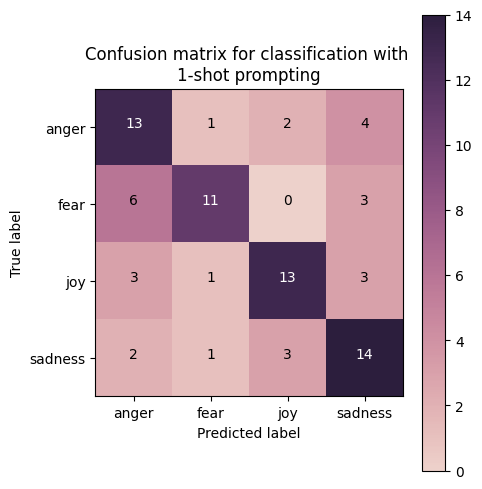

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: and apparently he's supposed to have a Scottish accent??? I'm 
Class: anger

Text: -- haired man strides close and watches as the Major flinches away from him, the reaction draws a growl from his throat.  -- (@DocHQuinzel)
Class: anger

Text: @hollyrobinson__ Part 2-was buzzing for a cheeky squashie or two-this was NOT what i expected.SORT IT OUT! #food #angry  @coopuk @coopukfood
Class: anger

Text: Mm, okay. Ham for you and turkey for me.' Gives his hair a ruffle before heading back in the kitchen to set out the &gt;&gt;\n@DarkSithKenobi
Class: anger

Text: Grateful for all the hungry people in my life! Hungry to learn, change, grow, help, etc - not sure anybody has it better! 
Class: anger

Text: Hopefully I'll get this Best Buy job, and officaly #start my #streaming #career , working to

Processing samples for emotion: anger...:  50%|█████     | 10/20 [00:04<00:04,  2.10it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 49.832761965s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-flash-lite', 'location': 'global'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:53<00:19,  3.84s/it]

Rate limit of 15 requests per minute reached. Waiting for 6.50 seconds.


Processing samples for emotion: fear...:  30%|███       | 6/20 [00:02<00:06,  2.05it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 48.966488288s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-lite'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:51<00:53,  5.38s/it]

Rate limit of 15 requests per minute reached. Waiting for 6.11 seconds.


Processing samples for emotion: joy...:  10%|█         | 2/20 [00:00<00:07,  2.51it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 48.789604132s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-flash-lite', 'location': 'global'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:48<02:09,  8.62s/it]

Rate limit of 15 requests per minute reached. Waiting for 6.46 seconds.


Processing samples for emotion: joy...:  90%|█████████ | 18/20 [01:01<00:01,  1.77it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 48.005768811s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.5-flash-lite'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 6.14 seconds.


Processing samples for emotion: sadness...:  70%|███████   | 14/20 [00:13<00:02,  2.05it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15\nPlease retry in 47.739416267s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-flash-lite', 'location': 'global'}, 'quotaValue': '15'}]}, {'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis

Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [00:59<01:12, 14.42s/it]

Rate limit of 15 requests per minute reached. Waiting for 6.29 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:09<00:00,  3.45s/it]



Results saved to ./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 61.25%
              precision    recall  f1-score   support

       anger       0.55      0.60      0.57        20
        fear       0.79      0.55      0.65        20
         joy       0.80      0.60      0.69        20
     sadness       0.48      0.70      0.57        20

    accuracy                           0.61        80
   macro avg       0.65      0.61      0.62        80
weighted avg       0.65      0.61      0.62        80



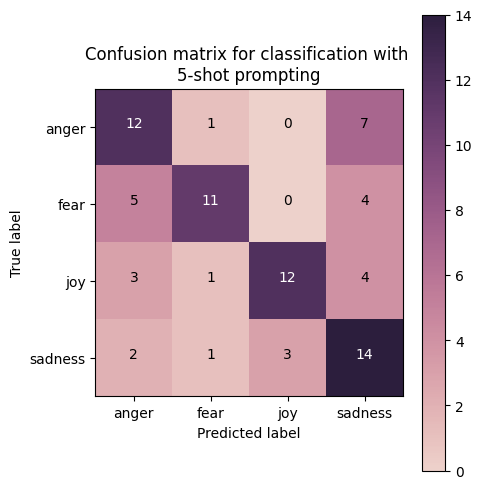

In [ ]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### **>>> Exercise 6 (Take home):**

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

zero-shot的分類效果最弱，準確率僅約五成，模型在沒有示例的情況下只能依靠語言直覺推測，四類情緒的分類表現不均衡，且在混淆矩陣中可以看到明顯的跨類別誤判。當加入一個示例後，模型的分類能力大幅提升，1-shot的準確率提高到六成以上，四個情緒類別在precision與recall上都有明顯改善，混淆矩陣也顯示模型的分類邏輯更集中、誤分類明顯減少，整體效果最為穩定。然而，當示例增加到五個時，模型的表現並未進一步提升，準確率反而略為下降，部分類別甚至出現分類不穩定的情況，推測可能是prompt過長或示例資訊過多造成干擾，使模型無法有效吸收額外訊息。因此，本次實驗顯示少量示例（1-shot）即可帶來最佳效益，而示例數量並非越多越好。

---
##### **>>> Exercise 7 (Take home):**

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [71]:
# Answer here
import pandas as pd
import glob

# === 1. 讀取三個結果檔 ===
path = "./DM2025-Lab2-Exercise/results/llm_classification_results"

# 把所有對應的 csv 抓出來
files = sorted(glob.glob(f"{path}/results_samples_20_shots_*.csv"))

print("Loaded files:", files)

# 用檔名判斷哪一個是 0 / 1 / 5 shot
file_map = {}
for f in files:
    if "_shots_0" in f:
        file_map[0] = f
    elif "_shots_1" in f:
        file_map[1] = f
    elif "_shots_5" in f:
        file_map[5] = f

# 檢查一下是否都有抓到
print("File map:", file_map)

# 讀取三個 csv
df0 = pd.read_csv(file_map[0])   # 0-shot
df1 = pd.read_csv(file_map[1])   # 1-shot
df5 = pd.read_csv(file_map[5])   # 5-shot

# 看一下欄位名稱（第一次跑建議保留）
print("Columns in df0:", df0.columns)

# === 2. 整併成同一個 DataFrame 方便比較 ===
# 這裡假設欄位名稱為：
#   text            → 文字內容
#   true_emotion    → 正確標籤
#   predicted_emotion → 模型預測情緒
# 若你的欄位名稱不同，請在這裡修改對應即可。

df = pd.DataFrame({
    "text": df0["text"],
    "true": df0["true_emotion"],
    "pred_0shot": df0["predicted_emotion"],
    "pred_1shot": df1["predicted_emotion"],
    "pred_5shot": df5["predicted_emotion"]
})

# === 3. 找出三種情況 ===

# 3-1 變好：0-shot 錯，但 1-shot 或 5-shot 有變正確
improved_cases = df[
    (df["pred_0shot"] != df["true"]) &
    ((df["pred_1shot"] == df["true"]) | (df["pred_5shot"] == df["true"]))
]

# 3-2 沒改善：三種設定都錯
no_improvement = df[
    (df["pred_0shot"] != df["true"]) &
    (df["pred_1shot"] != df["true"]) &
    (df["pred_5shot"] != df["true"])
]

# 3-3 變差：0-shot 原本正確，但 1-shot 或 5-shot 變錯
worse_cases = df[
    (df["pred_0shot"] == df["true"]) &
    ((df["pred_1shot"] != df["true"]) | (df["pred_5shot"] != df["true"]))
]

# === 4. 印出結果 ===
pd.set_option("display.max_colwidth", 150)  # 文字不要被截斷太多

print("\n===== 🟢 Improved Cases（分類變好）=====")
print(improved_cases[["text", "true", "pred_0shot", "pred_1shot", "pred_5shot"]])
print("\nTotal improved:", len(improved_cases))

print("\n===== 🟡 No Improvement（都沒改善）=====")
print(no_improvement[["text", "true", "pred_0shot", "pred_1shot", "pred_5shot"]])
print("\nTotal no improvement:", len(no_improvement))

print("\n===== 🔴 Worse Cases（反而變差）=====")
print(worse_cases[["text", "true", "pred_0shot", "pred_1shot", "pred_5shot"]])
print("\nTotal worse:", len(worse_cases))

# 若你想把結果存成 csv 方便檢查，也可以加上：
# improved_cases.to_csv(f"{path}/analysis_improved_cases.csv", index=False)
# no_improvement.to_csv(f"{path}/analysis_no_improvement.csv", index=False)
# worse_cases.to_csv(f"{path}/analysis_worse_cases.csv", index=False)


Loaded files: ['./DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_0.csv', './DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_1.csv', './DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_5.csv']
File map: {0: './DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_0.csv', 1: './DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_1.csv', 5: './DM2025-Lab2-Exercise/results/llm_classification_results/results_samples_20_shots_5.csv'}
Columns in df0: Index(['text', 'true_emotion', 'predicted_emotion'], dtype='object')

===== 🟢 Improved Cases（分類變好）=====
                                                                                                                                                text  \
0                                                         @CozanGaming that's what lisa asked before she started raging at me, 'can I call yo

---
### **2.7 Extra LLM Related Materials:**
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---